C:\Users\DavidH\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]


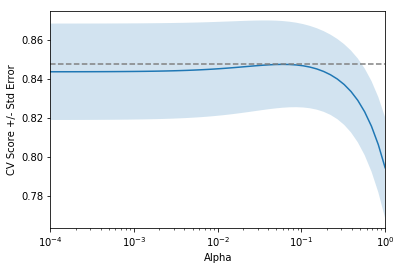

In [23]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#Read the CSV file into a DataFrame
df = pd.read_csv('gm_2008_region.csv')

#Define X, y
y = df['life']
y = y.reshape(-1, 1)
X = df.drop('life', axis=1).drop('Region', axis=1)

#Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

#Create a ridge regressor
ridge = Ridge(normalize=True)

#Compute scores over range of alphas
for alpha in alpha_space:

    #Use this alpha for our ridge regression
    ridge.alpha = alpha
    
    #Perform 10-fold CV
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

#Define plot function
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    #First plot in 1*1 grid
    ax = fig.add_subplot(1,1,1)
    #Axes of the plot
    ax.plot(alpha_space, cv_scores)

    #Compute std error
    std_error = cv_scores_std / np.sqrt(10)

    #Color the interval between cv_scores +/- std_error
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    #Setting labels
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    #Mark the max score
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    #Plot settings
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()    

# Display the plot
display_plot(ridge_scores, ridge_scores_std)